<a href="https://colab.research.google.com/github/Gyanendra079/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
file_path = '/content/drive/MyDrive/almabetter/capstone projects/python project 1/Airbnb NYC 2019.csv'
airbnb_df= pd.read_csv(file_path)

In [193]:
df = airbnb_df.copy()

In [194]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [195]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#We are getting the data which relevant to the analysis.

In [197]:
#We are dropping the id,name,host_id,host_name and last review
df.drop(['id','name','host_id','host_name','last_review'],axis=1,inplace=True)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [199]:
#Filling the null values of column rview_per_month with zero value
df['reviews_per_month'].fillna(0, inplace=True)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


#1.Which neighbourhood_group has how much number of the room present in there respective region?

In [201]:
num_of_room_present = df.groupby("neighbourhood_group").size()
print(num_of_room_present)

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64


**We can plot a pie chart to get understand the data in more visual manner.**

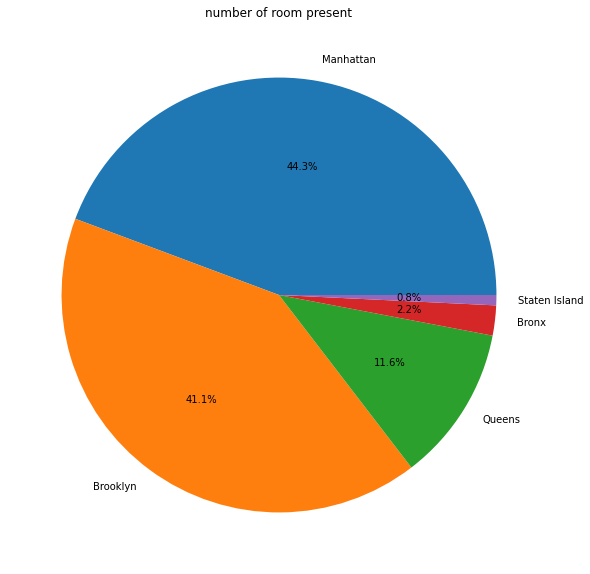

In [202]:
plt.figure(figsize=(20,10))
plt.title("number of room present")
pie_plot = plt.pie(df.neighbourhood_group.value_counts(),labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%')

**CONCLUSION**:The Manhattan neighbourhood group has highest number of rooms available and on second there is brooklyn & last Staten Island with only 0.8% of total rooms available.

#2.What are the different types of room available to the person travelling and booking through airbnb?

In [203]:
list_of_types_of_room_available = list(df.room_type.unique())
print(list_of_types_of_room_available)

['Private room', 'Entire home/apt', 'Shared room']


**Plotting the bar chart which shows number of different types of room available to the people travelling.**

In [204]:
different_room_type = df["room_type"].value_counts()
different_room_type

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

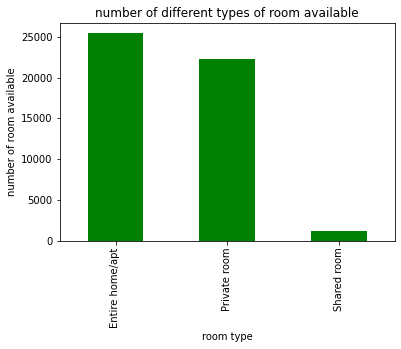

In [205]:
different_room_type.plot(kind='bar',color='green')
plt.title('number of different types of room available')
plt.ylabel('number of room available')
plt.xlabel('room type')
plt.rcParams['figure.figsize'] = (10, 5)

**CONCLUSION:**The room type which is available highest is Entire home/apt & shared room is very low in comparison to the other two.

#3. What are the different types of room available to the people in various neighbourhood group?

In [206]:
type_of_room_in_various_neighbourhood = df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
print(type_of_room_in_various_neighbourhood)

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


**Now we have to plot the bar chart to illustrate the type of room available in various neighbourhood.** 

Text(0, 0.5, 'room types')

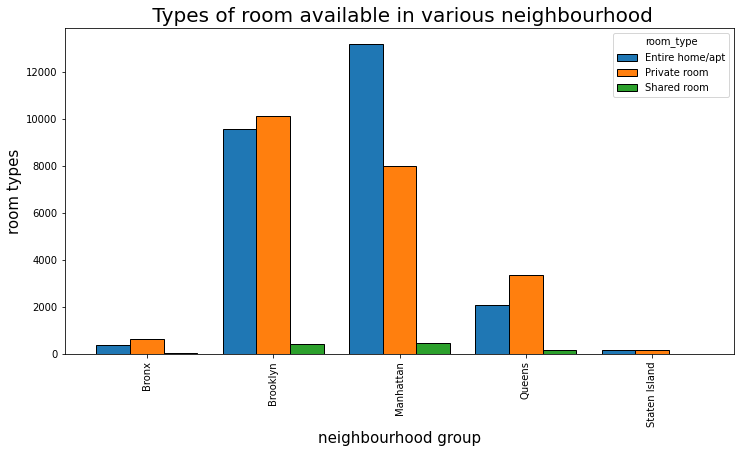

In [207]:
ax = df.groupby('neighbourhood_group')['room_type'].value_counts().unstack().plot.bar(
    width=0.8,                                                                 
    linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,
    )

ax.set_title(" Types of room available in various neighbourhood", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("neighbourhood group", fontsize = 15)
ax.set_ylabel("room types", fontsize = 15)

**Conclusion**:The Manhattan has the maximum no. of room type in the category of Entire home/apt which is 13199 & Brooklyn has highest no. in the category of Private room. 

#4.How many neighbourhood are present in a particular neighbourhood group in which a person can get a room? 

We are only only calculating the unique neighbourhood in a given partiular neighbourhood group it does not concern with no of rooms available in a given neighborhood group.

In [208]:
unique_neighbourhood_in_various_neighbourhood = df.groupby('neighbourhood_group')['neighbourhood'].unique()

In [209]:
unique_neighbourhood_in_various_neighbourhood

neighbourhood_group
Bronx            [Highbridge, Clason Point, Eastchester, Kingsb...
Brooklyn         [Kensington, Clinton Hill, Bedford-Stuyvesant,...
Manhattan        [Midtown, Harlem, East Harlem, Murray Hill, He...
Queens           [Long Island City, Woodside, Flushing, Sunnysi...
Staten Island    [St. George, Tompkinsville, Emerson Hill, Shor...
Name: neighbourhood, dtype: object

In [210]:
number_of_unique_neighbourhood_in_various_neighbourhood = df.groupby('neighbourhood_group')['neighbourhood'].nunique()

In [211]:
number_of_unique_neighbourhood_in_various_neighbourhood

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64

**Plot a bar chart to get the number of neighbourhood present in a particular neighbourhood group**.

Text(0, 0.5, 'neighbourhood ')

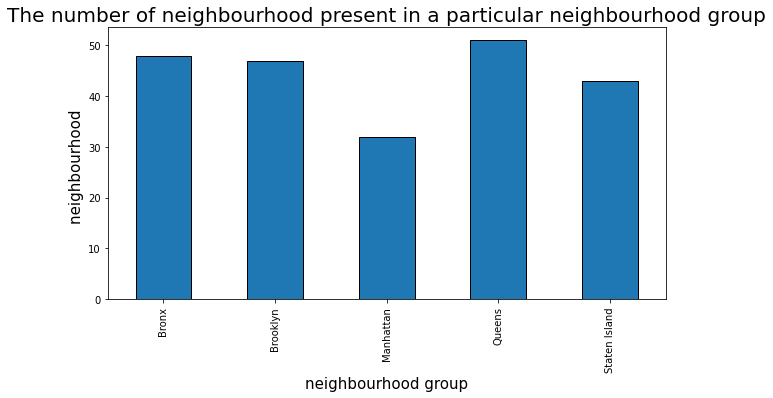

In [212]:
ax = number_of_unique_neighbourhood_in_various_neighbourhood.plot.bar(
    width=0.5,                                                                 
    linewidth=1,
    edgecolor='black',
    figsize = (10,5),
    fontsize = 10,
    )

ax.set_title("The number of neighbourhood present in a particular neighbourhood group", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("neighbourhood group", fontsize = 15)
ax.set_ylabel("neighbourhood ", fontsize = 15)

**Conclusion:**Queens has the highest number of unique neighbourhood present & manhattan has the lowest.

#5.What are the availability of the room with respect to the neighbourhood Group & room type?

In [213]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [214]:
Availabilty_on_neighbourhood = df.groupby(['room_type','neighbourhood_group'])['availability_365'].mean().unstack()

In [215]:
Availabilty_on_neighbourhood 

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,158.000000,97.205147,117.140996,132.267176,178.073864
Private room,171.331288,99.917983,101.845026,149.222716,226.361702
Shared room,154.216667,178.007264,138.572917,192.186869,64.777778


**We can plot a box plot on the basis of availability of various room type in a neighbourhood group**

Text(0.5, 0, 'Neighbourhood Group')

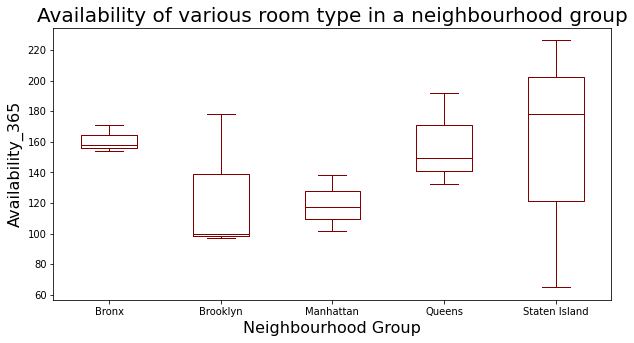

In [216]:
# Price distribution box plot
Availabilty_on_neighbourhood.plot.box(color='maroon')
plt.title('Availability of various room type in a neighbourhood group',fontsize=20)
plt.ylabel('Availability_365',fontsize=16)
plt.xlabel('Neighbourhood Group',fontsize=16)

**Conclusion**:
1.   Bronx has smallest variation in avaliabilty with median value around 158.
2.   Brooklyn has highest value 180 and lowest 98 with median 100. 
3.   Manhattan has range from 102 to 140 with median around 120.
4.   Queens has range from 110 to 190 with median around 150.
5.   Staten Island has largest range in which minimum value is 65,maximum value is 225,first quartile(Q1)=120,second quartile(Q2)/median=175 and third quartile(Q3)= 200.[***Note-All values are approx.]***

#6.What are the price distribution of various room_type in different neighbourhood group?  



In [217]:
price_distribution = df.groupby(['room_type','neighbourhood_group'])['price'].mean().unstack()
price_distribution

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,127.506596,178.327545,249.239109,147.050573,173.846591
Private room,66.788344,76.500099,116.776622,71.762456,62.292553
Shared room,59.800000,50.527845,88.977083,69.020202,57.444444


**We can plot a box plot on the price distribution of various room type in a neighbourhood group**

Text(0.5, 0, 'Neighbourhood Group')

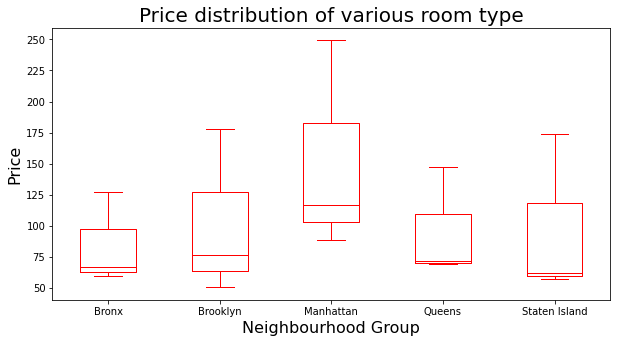

In [218]:
price_distribution.plot.box(color='red')
plt.title('Price distribution of various room type',fontsize=20)
plt.ylabel('Price',fontsize=16)
plt.xlabel('Neighbourhood Group',fontsize=16)

**Conclusion:** We have different price range in various neighbourhood with highest variation in manhattan group & median value is also highest in manhattan around 120.


In [219]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#7.What can we learn from predictions? (ex: locations, prices, reviews, etc)


In [ ]:
#We can figure out the neighbourhood on the basis of price and reviews to make the predictions on the basis of 

#8.Which hosts are the busiest and why?

#9.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

# 10. What is the relationship b/w the room type,minimum nights,number of reviews,reviews per month,calculated host listing count & availability around a year?

In [222]:
new_df = df[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
new_df.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,9,0.21,6,365
1,1,45,0.38,2,355
2,3,0,0.00,1,365
3,1,270,4.64,1,194
4,10,9,0.10,1,0


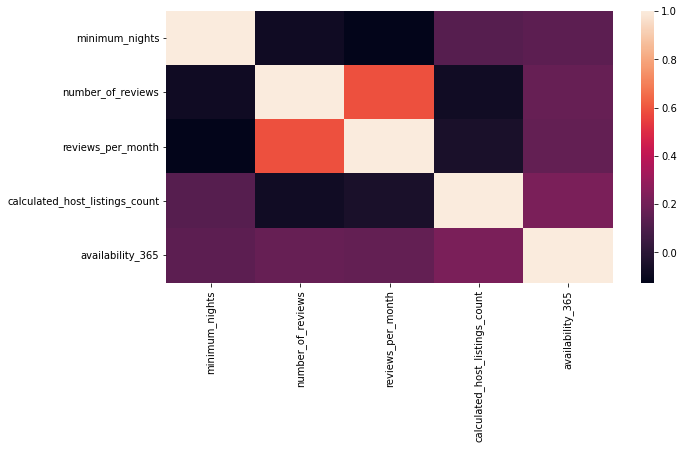

In [223]:
corr_df = new_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)